In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns
import glob
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))

In [ ]:
image_dir = Path('/content/drive/MyDrive/Augmentation Dataset')
filepaths = list(image_dir.glob(r'**/*/*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

,Filepath,Label
0,/content/drive/MyDrive/Augmentation Dataset/Ju...,Jujube Sun Burn
1,/content/drive/MyDrive/Augmentation Dataset/Ju...,Jujube Anthracnose
2,/content/drive/MyDrive/Augmentation Dataset/Ju...,Jujube Sun Burn


Visualization

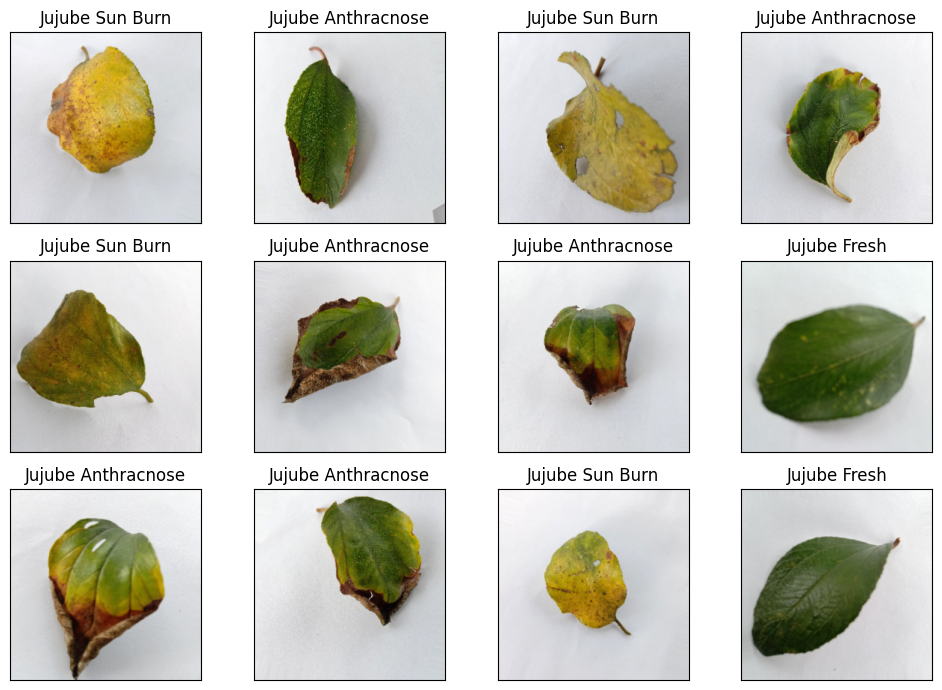

In [ ]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
vc = image_df['Label'].value_counts()
print(vc)

Label
Jujube Sun Burn       600
Jujube Anthracnose    600
Jujube Fresh          600
Jujube Brown Spot     600
Name: count, dtype: int64


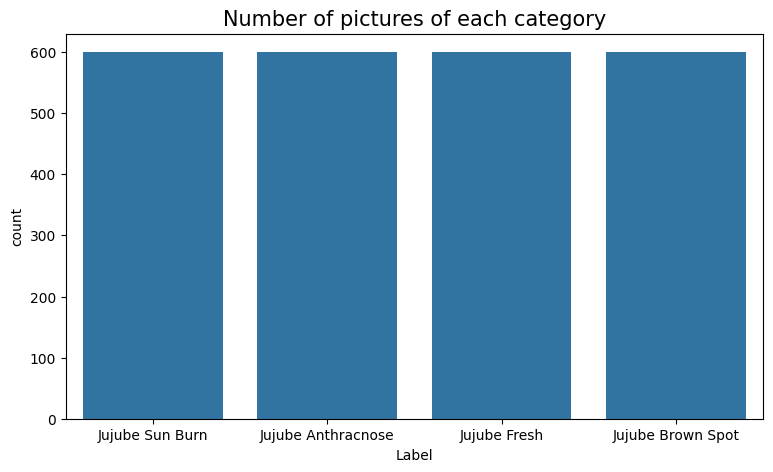

In [ ]:
# Display the number of pictures of each category
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()

Found 1920 validated image filenames belonging to 4 classes.
Found 1920 validated image filenames belonging to 4 classes.
Found 480 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D

# CNN


In [ ]:
input_shape = (32, 224, 224, 3)
n_classes = 4

model_01 = models.Sequential([
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_01.build(input_shape=input_shape)
model_01.summary()

model_01.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 222, 222, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (32, 220, 220, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 110, 110, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (32, 108, 108, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 52, 52, 128)        

In [ ]:
history_01 = model_01.fit(train_images,validation_data=val_images,epochs=15,verbose=1)

Epoch 1/15
60/60 [==============================] - 925s 15s/step - loss: 1.0579 - accuracy: 0.6182 - val_loss: 0.4405 - val_accuracy: 0.8422
Epoch 2/15
60/60 [==============================] - 25s 424ms/step - loss: 0.4463 - accuracy: 0.8370 - val_loss: 0.4313 - val_accuracy: 0.8406
Epoch 3/15
60/60 [==============================] - 25s 423ms/step - loss: 0.2370 - accuracy: 0.9141 - val_loss: 0.1202 - val_accuracy: 0.9599
Epoch 4/15
60/60 [==============================] - 25s 416ms/step - loss: 0.1420 - accuracy: 0.9443 - val_loss: 0.0652 - val_accuracy: 0.9786
Epoch 5/15
60/60 [==============================] - 34s 562ms/step - loss: 0.1042 - accuracy: 0.9625 - val_loss: 0.1018 - val_accuracy: 0.9589
Epoch 6/15
60/60 [==============================] - 26s 427ms/step - loss: 0.0619 - accuracy: 0.9802 - val_loss: 0.0866 - val_accuracy: 0.9661
Epoch 7/15
60/60 [==============================] - 25s 426ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0104 - val_accuracy: 0.9995




Train Accuracy and Loss Plot: 



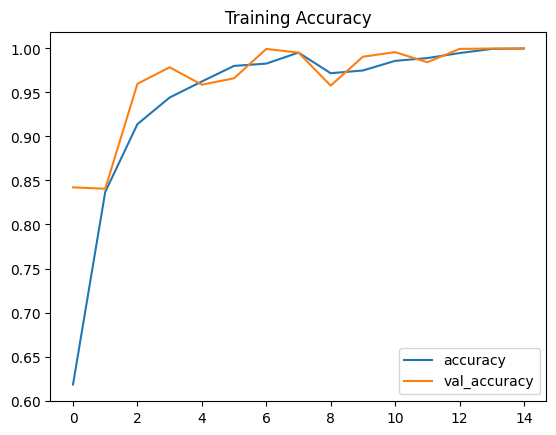

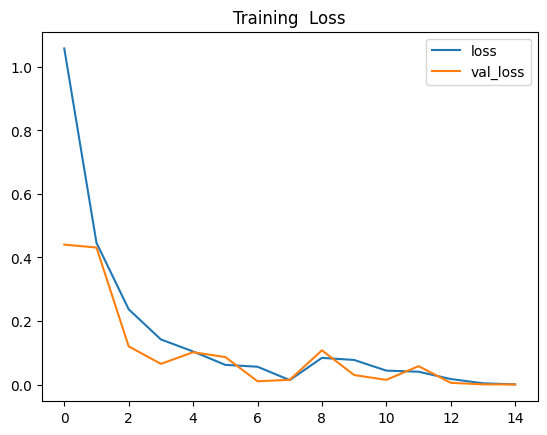



Accuracy on the test set: 95.83%
15/15 [==============================] - 3s 194ms/step
Accuracy: 0.95833
Precision: 0.95829
Recall: 0.95833
F1 Score: 0.9583
                    precision    recall  f1-score   support

Jujube Anthracnose       0.94      0.94      0.94       120
 Jujube Brown Spot       0.95      0.94      0.94       129
      Jujube Fresh       0.98      0.98      0.98       116
   Jujube Sun Burn       0.97      0.97      0.97       115

          accuracy                           0.96       480
         macro avg       0.96      0.96      0.96       480
      weighted avg       0.96      0.96      0.96       480

Confusion Matrix of CNN: 




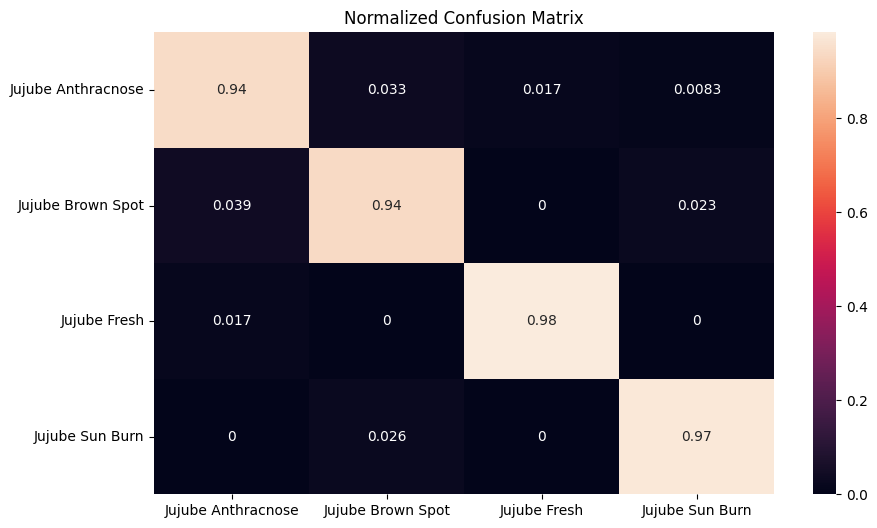

Performance: 

Rec=    95.90807067396536
Spe=    99.99145735005004
Pre=    95.90501442739445
FPR=    0.008542649949967963
FNR=    4.091929326034657
NPV=    99.99145736785007
FDR=    4.0949855726055615




In [ ]:
print('\n')


val_acc = history_01.history['val_accuracy']
train_acc = history_01.history['accuracy']

results = model_01.evaluate(test_images, verbose=0)
res=results[1]
test_acc = [round(res,4)]
#ploting training acc loss
print("Train Accuracy and Loss Plot: \n")
pd.DataFrame(history_01.history)[['accuracy','val_accuracy']].plot()
plt.title("Training Accuracy")
plt.show()
pd.DataFrame(history_01.history)[['loss','val_loss']].plot()
plt.title("Training  Loss")
plt.show()
print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))

from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model_01.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.Label)

print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
print(classification_report(y_test, pred))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
print("Confusion Matrix of CNN: \n\n")
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()
confusion_matrix=cf_matrix
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_test) - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
print("Performance: \n")
print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("\n")

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

# Pretrained Trained *Model*

In [ ]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(256, activation='relu')(x)

    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Found 1680 validated image filenames belonging to 4 classes.
Found 1680 validated image filenames belonging to 4 classes.
Found 720 validated image filenames belonging to 4 classes.






83683744/83683744 [==============================] - 3s 0us/step
Xception Model Training Started ===>>>
Epoch 1/10
53/53 [==============================] - 48s 701ms/step - loss: 0.4194 - accuracy: 0.8458 - val_loss: 0.2033 - val_accuracy: 0.9304
Epoch 2/10
53/53 [==============================] - 23s 441ms/step - loss: 0.1518 - accuracy: 0.9506 - val_loss: 0.0798 - val_accuracy: 0.9756
Epoch 3/10
53/53 [==============================] - 24s 449ms/step - loss: 0.0785 - accuracy: 0.9738 - val_loss: 0.0344 - val_accuracy: 0.9899
Epoch 4/10
53/53 [==============================] - 33s 621ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.0245 - val_accuracy: 0.9935
Epoch 5/10
53/53 [==============================] - 24s 462ms/step - loss: 0.0858 - accuracy: 0.9655 - val_loss: 0.0337 - val_accuracy: 

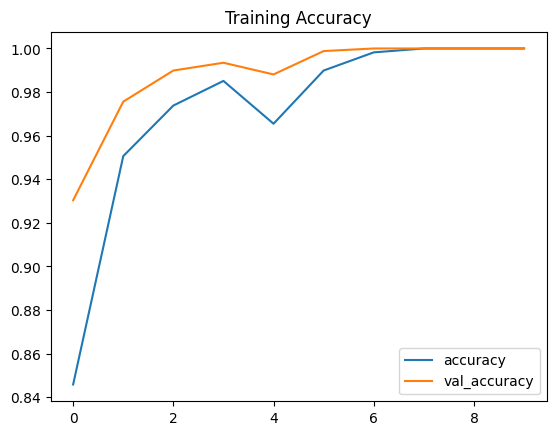

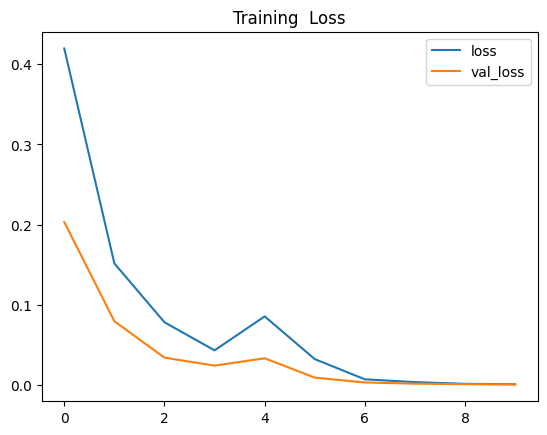



Accuracy on the test set: 95.83%
23/23 [==============================] - 7s 240ms/step
Accuracy: 0.95833
Precision: 0.95837
Recall: 0.95833
F1 Score: 0.95835
                    precision    recall  f1-score   support

Jujube Anthracnose       0.95      0.95      0.95       181
 Jujube Brown Spot       0.95      0.96      0.95       183
      Jujube Fresh       0.98      0.97      0.97       180
   Jujube Sun Burn       0.95      0.95      0.95       176

          accuracy                           0.96       720
         macro avg       0.96      0.96      0.96       720
      weighted avg       0.96      0.96      0.96       720

Xception Confusion Matrix: 




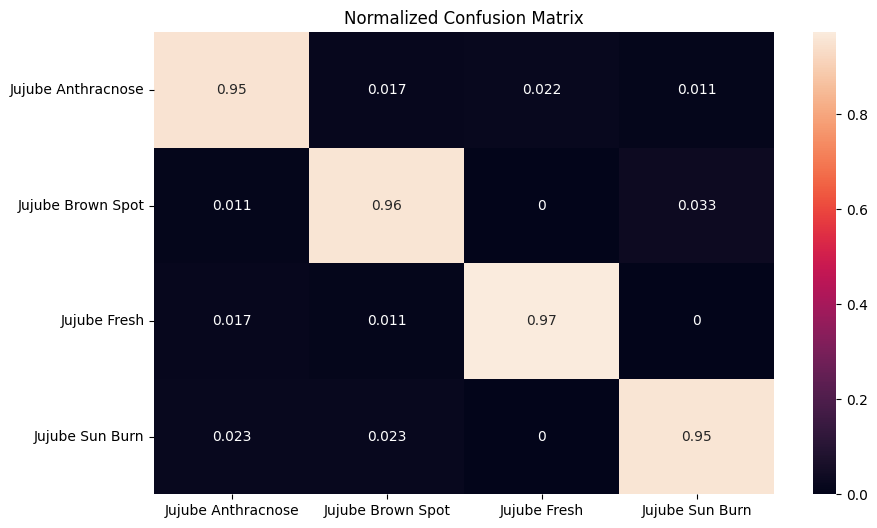

Performance: 

Rec=    95.8332018216766
Spe=    99.9942047313236
Pre=    95.83740842223555
FPR=    0.005795268676388608
FNR=    4.166798178323402
NPV=    99.99420472690875
FDR=    4.162591577764443




80134624/80134624 [==============================] - 4s 0us/step
VGG19 Model Training Started ===>>>
Epoch 1/10
53/53 [==============================] - 36s 521ms/step - loss: 1.0434 - accuracy: 0.5482 - val_loss: 0.7279 - val_accuracy: 0.6315
Epoch 2/10
53/53 [==============================] - 24s 445ms/step - loss: 0.5223 - accuracy: 0.7964 - val_loss: 0.3731 - val_accuracy: 0.8887
Epoch 3/10
53/53 [==============================] - 24s 450ms/step - loss: 0.3258 - accuracy: 0.8917 - val_loss: 0.2991 - val_accuracy: 0.8744
Epoch 4/10
53/53 [==============================] - 32s 617ms/step - loss: 0.2648 - accuracy: 0.9012 - val_loss: 0.2721 - val_accuracy: 0.8958
Epoch 5/10
53/53 [==============================] - 32s 617ms/step - loss: 0.2368 - accuracy: 0.9107 - val_loss: 0.1570 - val

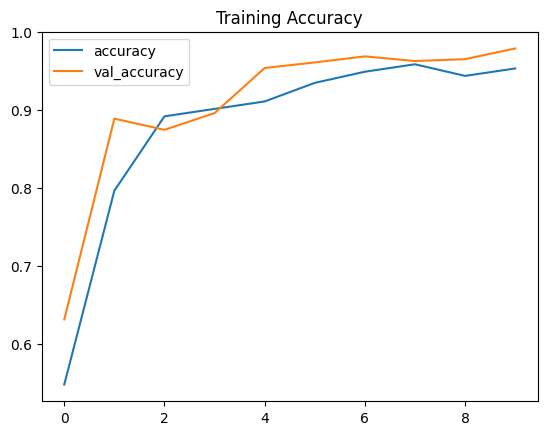

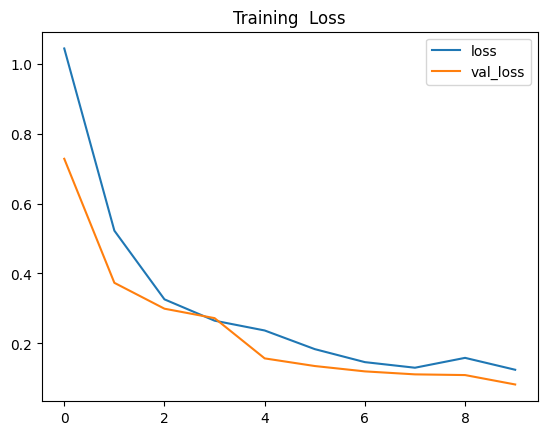



Accuracy on the test set: 92.22%
23/23 [==============================] - 5s 211ms/step
Accuracy: 0.92222
Precision: 0.92486
Recall: 0.92222
F1 Score: 0.92271
                    precision    recall  f1-score   support

Jujube Anthracnose       0.98      0.92      0.95       181
 Jujube Brown Spot       0.86      0.87      0.87       183
      Jujube Fresh       0.98      0.94      0.96       180
   Jujube Sun Burn       0.88      0.96      0.92       176

          accuracy                           0.92       720
         macro avg       0.92      0.92      0.92       720
      weighted avg       0.92      0.92      0.92       720

VGG19 Confusion Matrix: 




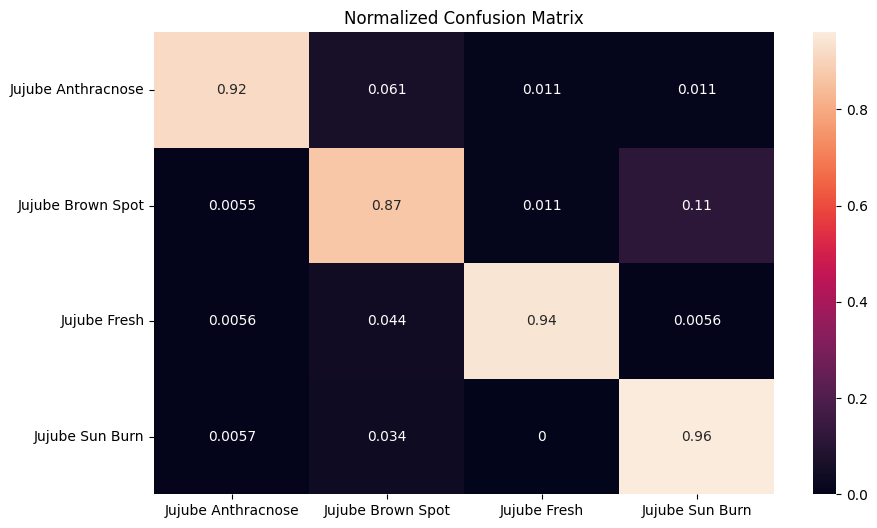

Performance: 

Rec=    92.26628120028286
Spe=    99.98924378470136
Pre=    92.52133082136699
FPR=    0.010756215298633
FNR=    7.733718799717123
NPV=    99.98924391213457
FDR=    7.4786691786330195




In [ ]:
# Dictionary with the models
models = {
    "Xception": {"model":tf.keras.applications.Xception, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')
print('\n')

# Fit the models
for name, model in models.items():
    print('\n')

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m


    print(f"{name:2} Model Training Started ===>>>")


    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=10,verbose=1)

    # Sav the duration, the train_accuracy and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:2} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

    results = m.evaluate(test_images, verbose=0)
    res=results[1]
    models[name]['test_accuracy'] = [round(res,4)]

    #ploting training acc loss
    print(f"{name:2} Train Accuracy and Loss Plot: \n")

    pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
    plt.title("Training Accuracy")
    plt.show()
    pd.DataFrame(history.history)[['loss','val_loss']].plot()
    plt.title("Training  Loss")
    plt.show()

    print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))


    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    pred = m.predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    y_test = list(test_df.Label)

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
    print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
    print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
    print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
    print(classification_report(y_test, pred))


    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import math
    from numpy import mean


    print(f"{name:2} Confusion Matrix: \n\n")
    cf_matrix = confusion_matrix(y_test, pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title('Normalized Confusion Matrix')
    plt.show()

    confusion_matrix=cf_matrix

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = len(y_test) - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    print("Performance: \n")
    print("Rec=   ",mean(TPR)*100)
    print("Spe=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("NPV=   ",mean(NPV)*100)
    print("FDR=   ",mean(FDR)*100)
    print("\n")

<ipython-input-22-d9589be1019f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x='Deep Learning Model', y='Accuracy',data=df, palette=colors)
<ipython-input-22-d9589be1019f>:12: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  p = sns.barplot(x='Deep Learning Model', y='Accuracy',data=df, palette=colors)


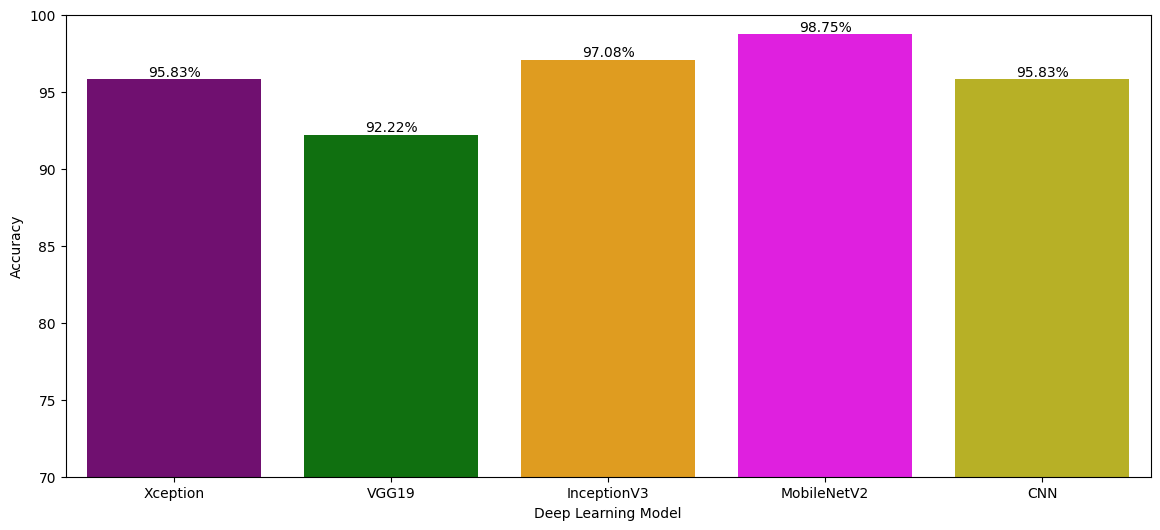

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "#87CEEB"]

df = pd.DataFrame(data=
{'Deep Learning Model':['Xception','VGG19', 'InceptionV3', 'MobileNetV2', 'CNN'],
'Accuracy':[95.83,92.22,97.08,98.75,95.83]})

plt.figure(figsize=(14,6))

p = sns.barplot(x='De2nn
744
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)

Found 1680 validated image filenames belonging to 4 classes.
Found 1680 validated image filenames belonging to 4 classes.
Found 720 validated image filenames belonging to 4 classes.






9406464/9406464 [==============================] - 1s 0us/step
MobileNetV2 Model Training Started ===>>>
Epoch 1/10
53/53 [==============================] - 27s 440ms/step - loss: 0.2491 - accuracy: 0.9113 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 2/10
53/53 [==============================] - 32s 609ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0147 - val_accuracy: 0.9982
Epoch 3/10
53/53 [==============================] - 22s 417ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 4/10
53/53 [==============================] - 32s 603ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
53/53 [==============================] - 22s 420ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy:

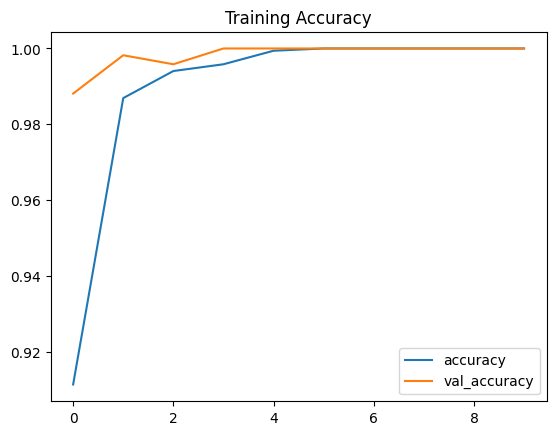

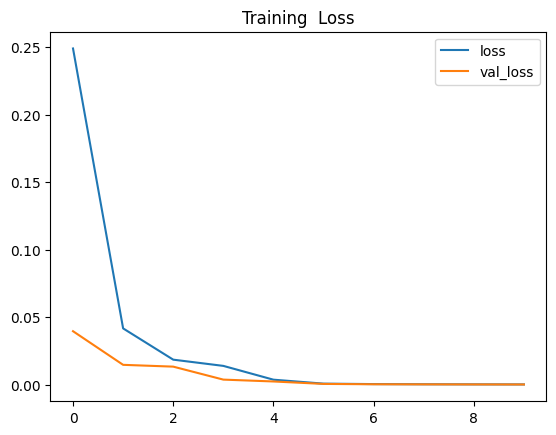



Accuracy on the test set: 98.75%
23/23 [==============================] - 5s 193ms/step
Accuracy: 0.9875
Precision: 0.98749
Recall: 0.9875
F1 Score: 0.98749
                    precision    recall  f1-score   support

Jujube Anthracnose       0.99      0.98      0.99       181
 Jujube Brown Spot       0.98      0.98      0.98       183
      Jujube Fresh       0.99      1.00      1.00       180
   Jujube Sun Burn       0.98      0.98      0.98       176

          accuracy                           0.99       720
         macro avg       0.99      0.99      0.99       720
      weighted avg       0.99      0.99      0.99       720

MobileNetV2 Confusion Matrix: 




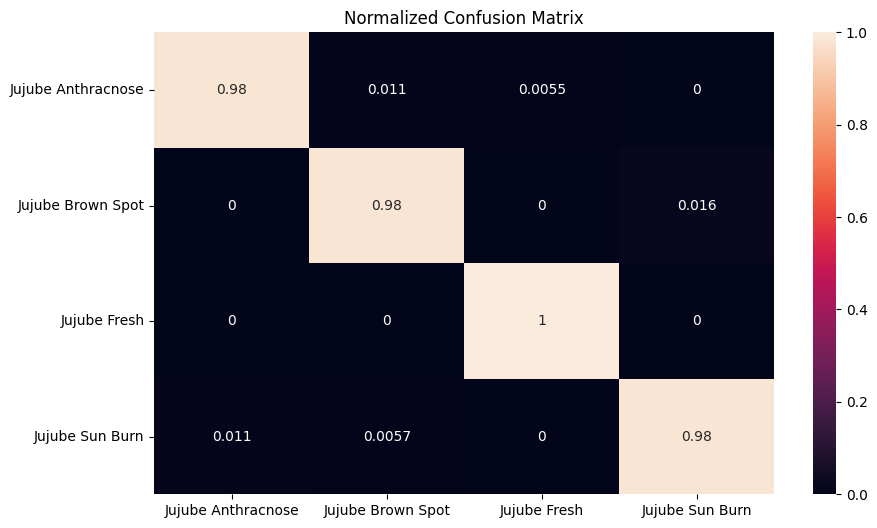

Performance: 

Rec=    98.7496629299059
Spe=    99.99826100546579
Pre=    98.74880768450663
FPR=    0.0017389945342059978
FNR=    1.2503370700941123
NPV=    99.99826100991197
FDR=    1.2511923154933742




87910968/87910968 [==============================] - 4s 0us/step
InceptionV3 Model Training Started ===>>>
Epoch 1/10
53/53 [==============================] - 33s 486ms/step - loss: 0.4218 - accuracy: 0.8405 - val_loss: 0.1431 - val_accuracy: 0.9452
Epoch 2/10
53/53 [==============================] - 23s 429ms/step - loss: 0.1155 - accuracy: 0.9655 - val_loss: 0.1467 - val_accuracy: 0.9411
Epoch 3/10
53/53 [==============================] - 23s 429ms/step - loss: 0.0921 - accuracy: 0.9673 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 4/10
53/53 [==============================] - 23s 444ms/step - loss: 0.0491 - accuracy: 0.9815 - val_loss: 0.0185 - val_accuracy: 0.9970
Epoch 5/10
53/53 [==============================] - 23s 431ms/step - loss: 0.0365 - accuracy: 0.9851 - val_loss: 0.

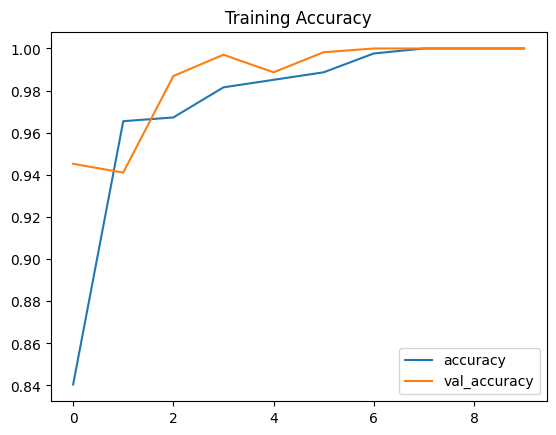

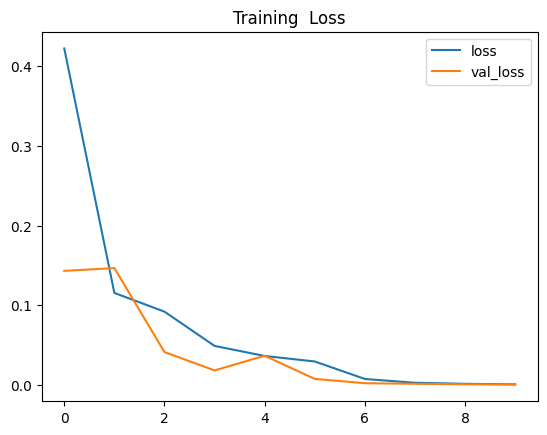



Accuracy on the test set: 97.08%
23/23 [==============================] - 6s 227ms/step
Accuracy: 0.97083
Precision: 0.97092
Recall: 0.97083
F1 Score: 0.97086
                    precision    recall  f1-score   support

Jujube Anthracnose       0.96      0.97      0.96       181
 Jujube Brown Spot       0.96      0.97      0.97       183
      Jujube Fresh       0.97      0.97      0.97       180
   Jujube Sun Burn       0.99      0.98      0.98       176

          accuracy                           0.97       720
         macro avg       0.97      0.97      0.97       720
      weighted avg       0.97      0.97      0.97       720

InceptionV3 Confusion Matrix: 




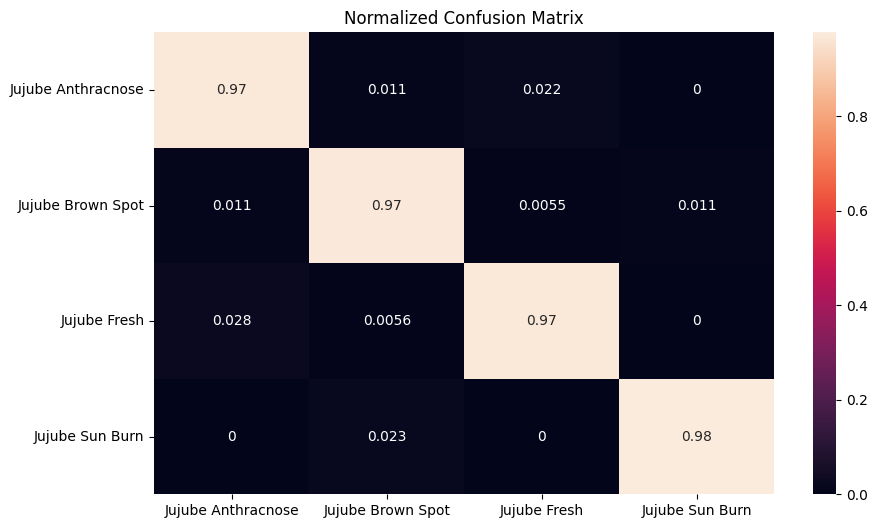

Performance: 

Rec=    97.08669545742727
Spe=    99.99594811607432
Pre=    97.09645238257103
FPR=    0.0040518839256922425
FNR=    2.9133045425727255
NPV=    99.99594811356296
FDR=    2.9035476174289636




In [ ]:
# Dictionary with the models
models = {
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')
print('\n')

# Fit the models
for name, model in models.items():
    print('\n')

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m


    print(f"{name:2} Model Training Started ===>>>")


    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=10,verbose=1)

    # Sav the duration, the train_accuracy and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:2} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

    results = m.evaluate(test_images, verbose=0)
    res=results[1]
    models[name]['test_accuracy'] = [round(res,4)]

    #ploting training acc loss
    print(f"{name:2} Train Accuracy and Loss Plot: \n")

    pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
    plt.title("Training Accuracy")
    plt.show()
    pd.DataFrame(history.history)[['loss','val_loss']].plot()
    plt.title("Training  Loss")
    plt.show()

    print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))


    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    pred = m.predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    y_test = list(test_df.Label)

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
    print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
    print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
    print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
    print(classification_report(y_test, pred))


    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import math
    from numpy import mean


    print(f"{name:2} Confusion Matrix: \n\n")
    cf_matrix = confusion_matrix(y_test, pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title('Normalized Confusion Matrix')
    plt.show()

    confusion_matrix=cf_matrix

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = len(y_test) - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    print("Performance: \n")
    print("Rec=   ",mean(TPR)*100)
    print("Spe=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("NPV=   ",mean(NPV)*100)
    print("FDR=   ",mean(FDR)*100)
    print("\n")